# Number of Ebola Cases and Deaths in Affected Countries

This project investigates a dataset containing the total number of probable, confirmed and suspected Ebola cases and deaths in Guinea, Liberia, Sierra Leone, Nigeria, Senegal, Mali, Spain, USA, UK and Italy according to Ebola Data and Statistics.

The data can be downloaded from the following link: https://data.humdata.org/dataset/ebola-cases-2014

Summary of findings: \
The Ebola virus is highly contagious, and it is associated with a significantly high mortality rate. As such, it swiftly propagated within the Guinea, Sierra Leone, and Liberia populations. Nonetheless, the outbreak was swiftly and predominantly curtailed within these nations, and instances of international transmission remained exceedingly rare. This project highlights the efficacy of the rigorous health regulations enforced by local authorities in these countries and the remarkably positive outcomes achieved through the public's diligent adherence to these emergency measures.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

In [2]:
# Import Dataset
ebola_df = pd.read_csv('ebola_data_db_format.csv')

In [3]:
# How many rows and columns?
print("Number of rows in dataset:", ebola_df.shape[0])
print("Number of columns in dataset:", ebola_df.shape[1])

Number of rows in dataset: 17585
Number of columns in dataset: 4


In [4]:
# What are the columns?
print("Columns in this dataset:", ebola_df.columns)

Columns in this dataset: Index(['Indicator', 'Country', 'Date', 'value'], dtype='object')


In [5]:
# Preview of dataset
ebola_df.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


In [6]:
# Any missing values?
ebola_df.isna().sum()

Indicator    0
Country      0
Date         0
value        0
dtype: int64

In [7]:
# Change date column into date datatype
ebola_df['Date'] = pd.to_datetime(ebola_df['Date'])

In [8]:
# Which countries are in this dataset
countries = ebola_df['Country'].unique()
countries

array(['Guinea', 'Liberia', 'Sierra Leone', 'United Kingdom', 'Mali',
       'Nigeria', 'Senegal', 'Spain', 'United States of America', 'Italy',
       'Liberia 2', 'Guinea 2'], dtype=object)

In [9]:
# Inspect Liberia 2 country reference
liberia2 = ebola_df[(ebola_df['Country'] == 'Liberia 2') & (ebola_df['Indicator'] == 'Cumulative number of confirmed Ebola cases')]
liberia2['value'].value_counts()

value
6.0    84
9.0    14
3.0     4
5.0     3
Name: count, dtype: int64

<Axes: xlabel='Date', ylabel='value'>

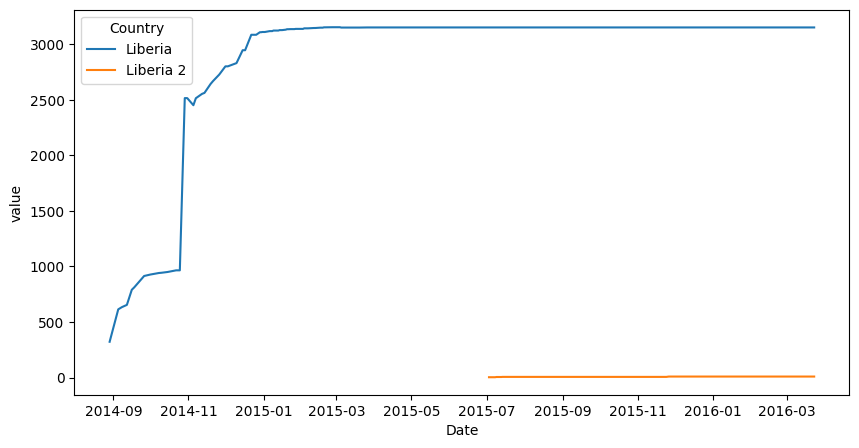

In [10]:
# Inspect Liberia country references
liberias = ebola_df[(ebola_df['Indicator'] == 'Cumulative number of confirmed Ebola cases') & 
                    ((ebola_df['Country'] == 'Liberia') | 
                    (ebola_df['Country'] == 'Liberia 2'))
                   ]
plt.figure(figsize=(10,5))
sns.lineplot(data=liberias, x="Date", y="value", hue="Country")

In [11]:
'''
It appears that data recorded under the 'Country' value 'Liberia 2' are errors.
More likely, this data are newly reported cases, rather than cumulative case numbers. 
Thus, Liberia 2 values will be dropped.
'''
ebola_df = ebola_df[ebola_df['Country'] != 'Liberia 2']

<Axes: xlabel='Date', ylabel='value'>

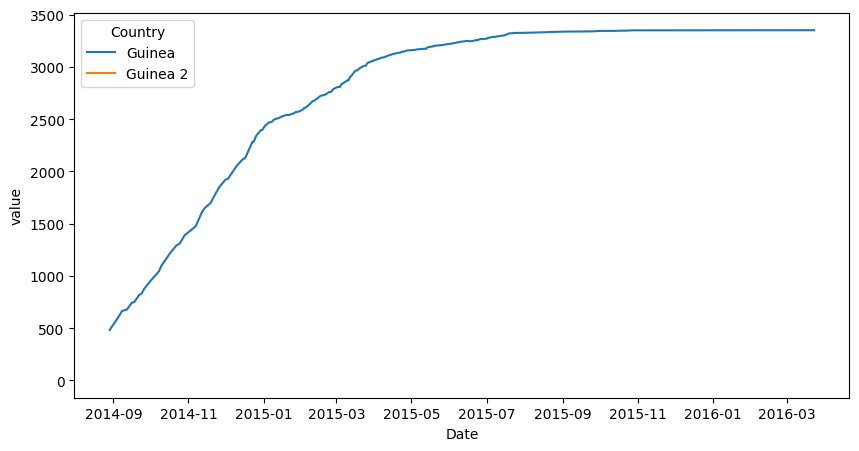

In [12]:
# Inspect Guinea country references
liberias = ebola_df[(ebola_df['Indicator'] == 'Cumulative number of confirmed Ebola cases') & 
                    ((ebola_df['Country'] == 'Guinea') | 
                    (ebola_df['Country'] == 'Guinea 2'))
                   ]
plt.figure(figsize=(10,5))
sns.lineplot(data=liberias, x="Date", y="value", hue="Country")

In [13]:
'''
Guinea 2 only has one datapoint and therefore will be dropped from the dataset. 
To drop rows containing 'value_to_drop' in 'column_name'
'''
ebola_df = ebola_df[ebola_df['Country'] != 'Guinea 2']

In [14]:
# Show value types of 'Indicator' column
ebola_df['Indicator'].value_counts()

Indicator
Cumulative number of confirmed, probable and suspected Ebola deaths                            2379
Cumulative number of confirmed Ebola cases                                                     2378
Cumulative number of confirmed, probable and suspected Ebola cases                             2371
Cumulative number of probable Ebola cases                                                      2364
Cumulative number of suspected Ebola cases                                                     2364
Cumulative number of confirmed Ebola deaths                                                    1542
Cumulative number of probable Ebola deaths                                                     1524
Cumulative number of suspected Ebola deaths                                                    1307
Number of confirmed Ebola cases in the last 21 days                                             169
Number of confirmed, probable and suspected Ebola cases in the last 21 days               

Since the majority of the reported data concerns cumulative numbers of cases and deaths, we will focus on the subset of data related to confirmed Ebola cases and deaths.

In [15]:
# Create a dataset containing the cumulative numbers of confirmed Ebola cases
confirmed_cases = ebola_df.loc[ebola_df['Indicator'] == 'Cumulative number of confirmed Ebola cases']
confirmed_cases.head()

,Indicator,Country,Date,value
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
8,Cumulative number of confirmed Ebola cases,Liberia,2015-03-10,3150.0
13,Cumulative number of confirmed Ebola cases,Sierra Leone,2015-03-10,8428.0
20,Cumulative number of confirmed Ebola cases,United Kingdom,2015-03-10,1.0
25,Cumulative number of confirmed Ebola cases,Mali,2015-03-10,7.0


In [16]:
# Create a dataset containing the cumulative numbers of confirmed Ebola deaths
confirmed_deaths = ebola_df.loc[ebola_df['Indicator'] == 'Cumulative number of confirmed Ebola deaths']
confirmed_deaths.head()

,Indicator,Country,Date,value
5,Cumulative number of confirmed Ebola deaths,Guinea,2015-03-10,1778.0
17,Cumulative number of confirmed Ebola deaths,Sierra Leone,2015-03-10,3263.0
46,Cumulative number of confirmed Ebola deaths,Nigeria,2015-03-10,7.0
50,Cumulative number of confirmed Ebola deaths,Senegal,2015-03-10,0.0
54,Cumulative number of confirmed Ebola deaths,Spain,2015-03-10,0.0


In [17]:
# Is the reporting of cumulative Ebola case statistics evenly distributed across all countries?
confirmed_cases['Country'].value_counts()

Country
Guinea                      259
Sierra Leone                259
Liberia                     258
Nigeria                     255
Senegal                     254
United States of America    245
Mali                        243
Spain                       243
United Kingdom              221
Italy                       141
Name: count, dtype: int64

In [18]:
# Is the reporting of cumulative Ebola deaths statistics evenly distributed across all countries?
confirmed_deaths['Country'].value_counts()

Country
Guinea                      257
Sierra Leone                257
Nigeria                     255
Senegal                     254
United States of America    245
Spain                       243
Liberia                      19
Mali                          9
United Kingdom                2
Italy                         1
Name: count, dtype: int64

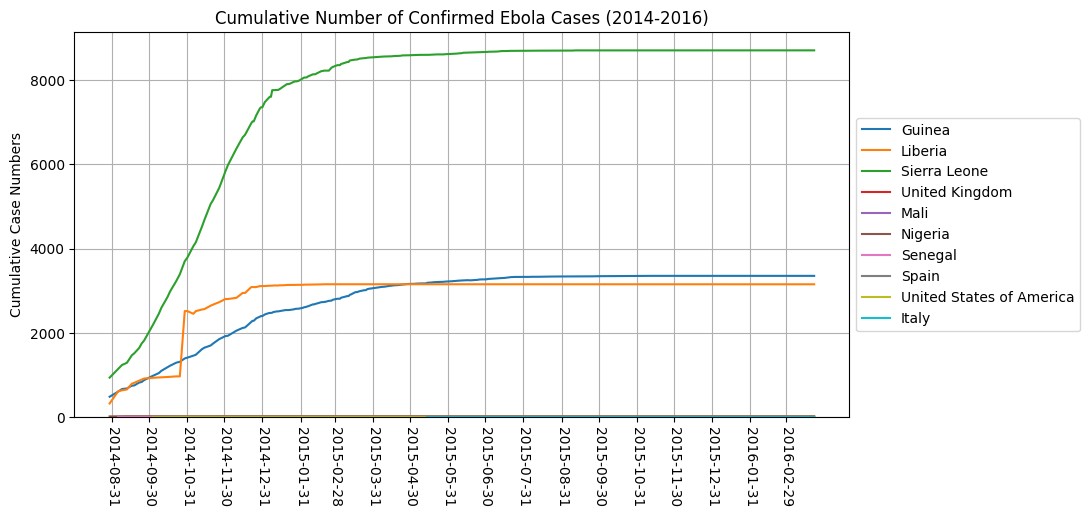

In [19]:
# Visualise the confirmed cumulative Ebola cases across all countries
plt.figure(figsize=(10, 5))

# Create a line plot using Seaborn with 'Date' on the x-axis, 'value' on the y-axis, and different colors for each 'Country'
ax = sns.lineplot(data=confirmed_cases, x="Date", y="value", hue="Country")

# Set the title of the plot
ax.set_title("Cumulative Number of Confirmed Ebola Cases (2014-2016)")

# Set the label for the y-axis
ax.set_ylabel("Cumulative Case Numbers")

# Remove x-axis label
ax.set_xlabel(None)

# Ensure the y-axis starts from 0
ax.set_ylim(ymin=0)

# Add grid lines to the plot
ax.grid(True)

# Define evenly spaced time intervals for the x-axis
date_range = pd.date_range(start=confirmed_cases['Date'].min(), end=confirmed_cases['Date'].max(), freq='1M')  # Adjust 'freq' as needed

# Set x-axis ticks to the defined date intervals
ax.set_xticks(date_range)

# Move the legend outside of the plot to the right
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Rotate x-axis labels for better readability
plt.xticks(rotation=270)

# Display the plot
plt.show()


In [20]:
confirmed_cases.sort_values(by='Date', inplace=True)
confirmed_cases.head(20)

/var/folders/yv/htfzllxj4dj3mxv393392b780000gn/T/ipykernel_29016/3584184733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_cases.sort_values(by='Date', inplace=True)


,Indicator,Country,Date,value
5098,Cumulative number of confirmed Ebola cases,Nigeria,2014-08-29,15.0
5094,Cumulative number of confirmed Ebola cases,Sierra Leone,2014-08-29,935.0
5090,Cumulative number of confirmed Ebola cases,Liberia,2014-08-29,322.0
5086,Cumulative number of confirmed Ebola cases,Guinea,2014-08-29,482.0
4976,Cumulative number of confirmed Ebola cases,Senegal,2014-09-05,1.0
4972,Cumulative number of confirmed Ebola cases,Nigeria,2014-09-05,18.0
4968,Cumulative number of confirmed Ebola cases,Sierra Leone,2014-09-05,1146.0
4964,Cumulative number of confirmed Ebola cases,Liberia,2014-09-05,614.0
4960,Cumulative number of confirmed Ebola cases,Guinea,2014-09-05,604.0
4862,Cumulative number of confirmed Ebola cases,Senegal,2014-09-08,1.0


In [21]:
confirmed_cases['Year and Month'] = confirmed_cases['Date'].dt.strftime("%Y / %m")
confirmed_cases.head()

/var/folders/yv/htfzllxj4dj3mxv393392b780000gn/T/ipykernel_29016/904961792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_cases['Year and Month'] = confirmed_cases['Date'].dt.strftime("%Y / %m")


,Indicator,Country,Date,value,Year and Month
5098,Cumulative number of confirmed Ebola cases,Nigeria,2014-08-29,15.0,2014 / 08
5094,Cumulative number of confirmed Ebola cases,Sierra Leone,2014-08-29,935.0,2014 / 08
5090,Cumulative number of confirmed Ebola cases,Liberia,2014-08-29,322.0,2014 / 08
5086,Cumulative number of confirmed Ebola cases,Guinea,2014-08-29,482.0,2014 / 08
4976,Cumulative number of confirmed Ebola cases,Senegal,2014-09-05,1.0,2014 / 09


In [23]:
# Create a map showing confirmed Ebola cases around the world
fig = px.choropleth(
    confirmed_cases,
    locationmode='country names',
    locations='Country',
    color='value',
    color_continuous_scale='reds',
    range_color=(0, 10000),
    animation_frame='Year and Month',
    center={'lat': 9.9456, 'lon': 9.6966}
)

fig.update_geos(fitbounds="locations", visible=True)

# Add a title to the map
fig.update_layout(
    title_text='Confirmed Ebola cases around the world',
    title_x=0.5  # Adjust the title position
)

# Change the color scale label
fig.update_coloraxes(colorbar_title='Number of Cases')

fig.show()


The line plot (Graph 1) depicted above illustrates a rapid surge in Ebola cases within Guinea, Sierra Leone, and Liberia, commencing in August 2014 and continuing through the first quarter of 2015. However, this exponential rise in cases eventually plateaued as a result of the swift and effective response to the virus. Notably, the incidence of Ebola cases outside of these three countries remained exceedingly rare, with the highest total being 19 cases in Nigeria.

By examining the choropleth map (Graph 2), it is evident that Ebola was promptly and effectively contained. By June 2016, Guinea and Liberia had achieved the status of being declared Ebola-free. Subsequently, in March 2016, Sierra Leone also declared an Ebola-free status (Source: [CDC Ebola Outbreak](https://www.cdc.gov/vhf/ebola/history/2014-2016-outbreak/index.html#:~:text=On%20January%2014%2C%202016%2C%20Liberia,declaration%20on%20June%201%2C%202016.)).

The low levels of international transmission underscores the effectiveness of the stringent regulations implemented by health authorities in these nations and the commendable compliance of their populations with these vital measures.